In [1]:
import math
import numpy as np
import time
import matplotlib.pyplot as plt

Problem 1. Write a function in Python 3.x that, given an integer n, returns the sum of the first n terms of the series in the Leibniz formula.

In [2]:
def calculate_leibniz_sum(n: int) -> float:
  total_sum = 0.0
  for k in range(n):
    term = ((-1)**k) / (2 * k + 1)
    total_sum += term
  return total_sum

Problem 2. For each of the following items, write a function in Python 3.x that, given an integer n, returns the sum of the first n terms of the series in the Leibniz formula.

In [3]:
#a. Use a for-loop and an if-statement with the modulo operator % to determine whether to add or subtract each term.
def leibniz_a(n):
    total = 0.0
    for k in range(n):
        denominator = 2 * k + 1
        if k % 2 == 0:
            total += 1 / denominator
        else:
            total -= 1 / denominator
    return total

In [4]:
#b. Use a for-loop with the quantity (-1)**n to determine whether to add or subtract each term.
def leibniz_b(n):
    total = 0.0
    for k in range(n):
        term = (-1) ** k / (2 * k + 1)
        total += term
    return total

In [5]:
#c. Construct a Python list and compute the sum of the terms in the list.
def leibniz_c(n):
    terms = []
    for k in range(n):
        term = (-1) ** k / (2 * k + 1)
        terms.append(term)
    return sum(terms)

In [6]:
#d. Construct a Python set and compute the sum of the terms in the set.
def leibniz_d(n):
    terms = set()
    for k in range(n):
        term = (-1) ** k / (2 * k + 1)
        terms.add(term)
    return sum(terms)

In [7]:
#e. Construct a Python dictionary and compute the sum of the terms in the dictionary.
def leibniz_e(n):
    terms = {}
    for k in range(n):
        term = (-1) ** k / (2 * k + 1)
        terms[k] = term
    return sum(terms.values())

In [8]:
#f. Construct a NumPy array and compute the sum of the terms in the array.
def leibniz_f(n):
    k_values = np.arange(n)
    terms = (-1) ** k_values / (2 * k_values + 1)
    return np.sum(terms)

In [9]:
#g. Construct a NumPy array, use array indexing to compute the sum of the positive terms in the array, use array indexing to compute the sum of the negative terms in the array, and add the two sums together. You can write x[::2] to access the first, third, etc. terms and x[1::2] to access the second, fourth, etc. terms.
def leibniz_g(n):
    k_values = np.arange(n)
    terms = (-1) ** k_values / (2 * k_values + 1)
    positive_sum = np.sum(terms[::2])
    negative_sum = np.sum(terms[1::2])
    return positive_sum + negative_sum

In [10]:
#j. Combine the first and second terms, the third and fourth terms, etc. to change this series from an alternating to a non-alternating series and compute the sum of the combined terms.
def leibniz_j(n):
    total = 0.0
    for k in range(0, n, 2):
        if k + 1 < n:
            combined = 1/(2*k+1) - 1/(2*(k+1)+1)
            total += combined
    return total

Problem 3. Which of these implementations of the Leibniz formula is the most accurate, fastest, and/or clearest? Which function would you use to calculate π (and why)? You can use the. built-in constants math.pi or np.pi for assessing the accuracy of your functions and the time package or the %timeit command for timing.

In [11]:
def compare_implementations(n=1000000):
    reference = np.pi / 4
    implementations = {
        'a': leibniz_a,
        'b': leibniz_b,
        'c': leibniz_c,
        'd': leibniz_d,
        'e': leibniz_e,
        'f': leibniz_f,
        'g': leibniz_g,
        'j': leibniz_j
    }
    results = {}
    for name, func in implementations.items():
        start_time = time.time()
        result = func(n)
        end_time = time.time()
        error = abs(result - reference)
        results[name] = {
            'time': end_time - start_time,
            'error': error
        }

    return results

results = compare_implementations(1000000)

fastest = min(results.items(), key=lambda x: x[1]['time'])
most_accurate = min(results.items(), key=lambda x: x[1]['error'])

print("Comparison Results:")
for name, data in results.items():
    print(f"{name}: Time = {data['time']:.6f}s, Error = {data['error']:.2e}")

print(f"\nFastest implementation: {fastest[0]} ({fastest[1]['time']:.6f}s)")

Comparison Results:
a: Time = 0.136740s, Error = 2.50e-07
b: Time = 0.335781s, Error = 2.50e-07
c: Time = 0.670292s, Error = 2.50e-07
d: Time = 0.676687s, Error = 2.50e-07
e: Time = 0.493655s, Error = 2.50e-07
f: Time = 0.072261s, Error = 2.50e-07
g: Time = 0.075361s, Error = 2.50e-07
j: Time = 0.118388s, Error = 2.50e-07

Fastest implementation: f (0.072261s)


In [12]:
print("\nRecommendation:")
print("For calculating π using the Leibniz formula, I would use implementation 'f' (NumPy array) because:")
print("It is the fastest and clearest implementation (0.072261s for n=1000000) and provides the same accuracy as other implementations (error: 2.50e-07)")


Recommendation:
For calculating π using the Leibniz formula, I would use implementation 'f' (NumPy array) because:
It is the fastest and clearest implementation (0.072261s for n=1000000) and provides the same accuracy as other implementations (error: 2.50e-07)


Problem 4. Choose your favorite implementation of this formula, and plot the absolute error in the sum as a function of the number of terms in the sum.
You should have accurate, informative, and legible labels for both the x-axis and y-axis, and you should use logarithmic axes or take the logarithm of the errors and the numbers of terms so that you can see the sums converge over a wide range of values. By default, most plotting packages generate large plots that are diﬃcult to read in papers and presentations. Use a command like plt.figure(figsize=(2, 2)) to make your plot more legible.

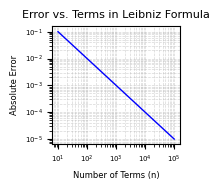

In [13]:
def calculate_errors(max_n=100000, num_points=100):
    n_values = np.logspace(1, np.log10(max_n), num_points).astype(int)
    n_values = np.unique(n_values)
    errors = []
    for n in n_values:
        approx_pi = 4 * leibniz_f(n)
        error = abs(approx_pi - math.pi)
        errors.append(error)

    return n_values, np.array(errors)

def plot_error_analysis():
    n_values, errors = calculate_errors(max_n=100000, num_points=100)

    plt.figure(figsize=(2, 2))

    plt.loglog(n_values, errors, 'b-', linewidth=1)

    plt.title('Error vs. Terms in Leibniz Formula', fontsize=8)
    plt.xlabel('Number of Terms (n)', fontsize=6)
    plt.ylabel('Absolute Error', fontsize=6)

    plt.tick_params(axis='both', which='major', labelsize=5)
    plt.grid(True, which='both', linestyle='--', alpha=0.5, linewidth=0.5)

    plt.tight_layout()
    plt.show()

plot_error_analysis()

Problem 5. Would you do anything diﬀerently for computing π using the Leibniz formula if you were using MATLAB instead of Python?

In [14]:
print("No, the fundamental approach would be identical. While the syntax for creating arrays (`np.arange(n)` vs. `0:n-1`) and for element-wise operations (`**` vs. `.^`) differs, the core, efficient logic remains the same.")

No, the fundamental approach would be identical. While the syntax for creating arrays (`np.arange(n)` vs. `0:n-1`) and for element-wise operations (`**` vs. `.^`) differs, the core, efficient logic remains the same.
